# Bode plots

## Instructions for safe use :)
-First run the first cell with the imports!!!
-If you want to simply draw a bode plot, go to the section of code underneath "Create easy bode plots". Then click ctrl+Enter or go to the toolbar and click on play (run cell). The instructions start from there.
-If you want to plot a sinusoidal in- and output of a linear system and see for yourself what happens, go to the code underneath "Relation between sinusoidal input/output" and click ctrl+Enter. A self-explanatory graphical user interface should pop up.

In [1]:
%matplotlib inline
import sys
from Tkinter import *
import matplotlib
#matplotlib.use("TkAgg")

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2TkAgg

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from math import floor
import matplotlib.animation as animation
from matplotlib import style
style.use("ggplot")

##Create Easy Bode Plots

Which method for defining your system? For numerator/denominator, type numden. For zeros and poles, type zp. For State space model, type ssnumden
Give the numerator as a list of coefficients. For example for s^2 + 2s + 3, input [1, 2, 3][1]
Give the denominator as a list of coefficients.[1,20,20,1]


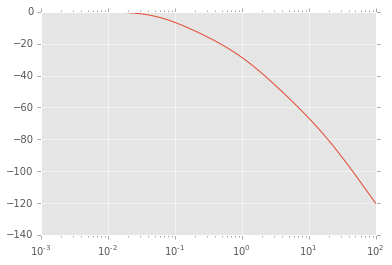

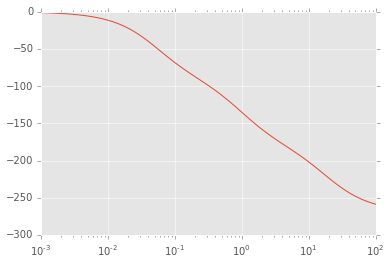

In [ ]:
method = raw_input('Which method for defining your system? For numerator/denominator, type numden. For zeros and poles, type zp. For State space model, type ss');
if method == "numden":
    num = eval(raw_input("Give the numerator as a list of coefficients. For example for s^2 + 2s + 3, input [1, 2, 3]"))
    den = eval(raw_input("Give the denominator as a list of coefficients."))
    s1 = signal.lti(num, den)
elif method == "zp":
    z = eval(raw_input("Give a list of zeros"))
    p = eval(raw_input("Give a list of poles"))
    K = eval(raw_input("Give a gain. (Notice that H(s) = K*(s-n1)*(s-n2).../(s-p1)*(s-p2)...)"))
    s1 = signal.lti(z, p, K)
elif method == "ss":
    A = eval(raw_input("Input the A-matrix. Remember a matrix is a list of lists. For exameple I2 = [[1, 0],[0, 1]]"))
    B = eval(raw_input("Input the B-matrix."))
    C = eval(raw_input("Input the C-matrix."))
    D = eval(raw_input("Input the D-matrix."))
    s1 = signal.lti(A, B, C, D)

w, mag, phase = s1.bode()

%matplotlib inline
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

##Relation between sinusoidal input/output

In [ ]:
def mclose():
    mGui.destroy() 
    
def Hstring(num,den):
    """
    Function that returns H(s) as a string, when the numerator and denominator are given as lists.
    """
    
    result = "H(s) = ("
    if num[0] < 0:
        result += "-"
    for i in range(len(num)):
        plusminus = " + "
        if i== len(num)-1 or num[i+1] < 0:
            plusminus = " - "
            
        if (len(num) - i-1) > 1:
            result += str(abs(num[i])) + "s^" + str(len(num)-i-1) + plusminus
        elif (len(num) - i-1) == 1:
            result += str(abs(num[i])) + "s" + plusminus
        elif (len(num) - i-1) == 0:
            result += str(abs(num[i])) + ")"
            
    result += " / ("
    if den[0] < 0:
        result += "-"
        
    for i in range(len(den)):
        plusminus = " + "
        if i== len(den)-1 or den[i+1] < 0:
            plusminus = " - "
        
        if (len(den) - i-1) > 1:
            result += str(abs(den[i])) + "s^" + str(len(den)-i-1) + plusminus
        elif (len(den) - i-1) == 1:
            result += str(abs(den[i])) + "s" + plusminus
        elif (len(den) - i-1) == 0:
            result += str(abs(den[i])) + ")"
            
    return result
    
def H(num,den,s):
    """
    Function to calculate H(s) in a certain value of s, when the numerator and denominator are given as lists.
    """
    
    numresult = 0
    denresult = 0
    for i in range(len(num)):
        numresult += num[-i-1]*s**i
    
    for i in range(len(den)):
        denresult += den[-i-1]*s**i
    
    return numresult/denresult

    
        
def minput():
    """
    The main function that calculates all the plot and places the text that needs to appear after clicking the OK button.
    """
    
    #First Plot: Sinusoidal input (x1,y1) and output (x1,y2)
    axes1.clear()
    
    mynum= eval(num.get())
    myden = eval(den.get())
    
    Amp = A.get()
    omega = w.get()
    
    x1 = np.linspace(0,8*np.pi/omega,1000)
    y1 = Amp*np.sin(omega*x1)
    
    Hw = H(mynum,myden,omega*1j)
    ang = np.angle(Hw)
    mag = abs(Hw)
    y2 = Amp*mag*np.sin(omega*x1+ang)
    line1 = axes1.plot(x1,y1,label="input")
    line2 = axes1.plot(x1,y2,'--',label="output")
    axes1.set_autoscaley_on(False)
    axes1.set_xlim([0,8*np.pi/omega])
    axes1.legend()
    
    canvas1.draw()
    
    #Second plot: Magnitude plot of H(s) around omega.
    axes2.clear()
    
    s1 = signal.lti(mynum, myden)
    w1 = np.logspace(floor(np.log10(omega)-2),floor(np.log10(omega)+3),10000)
    w1, mag, phase = s1.bode(w = w1)
    
    for k in range(len(phase)):
        phase[k] = (phase[k]+ 180)%360 - 180
    axes2.semilogx(w1, mag)
    axes2.plot(omega,20*np.log10(abs(Hw)),'ro')
    axes2.set_autoscaley_on(False)
    axes2.set_ylim([min(mag)-3,max(mag) + 3])
    
    canvas2.draw()
    
    #Third plot: Phase plot of H(s) around omega
    axes3.clear()
    
    axes3.semilogx(w1, phase)
    axes3.plot(omega,np.angle(Hw,deg = 1),'ro')
    axes3.set_autoscaley_on(False)
    axes3.set_ylim([-180,180])
    
    canvas3.draw()
    
    ##Fourth plot: Nyquist plot
    axes4.clear()
    
    w1 = np.logspace(-4,floor(np.log10(omega)+3),10000)
    Nyq1 = []
    Nyq2 = []
    for om in w1:
        Nyq1.append(H(mynum,myden,om*1j))
        Nyq2.append(H(mynum,myden,-om*1j))
    axes4.plot(np.real(Nyq1),np.imag(Nyq1),'b')
    axes4.plot(np.real(Nyq1),np.imag(Nyq2),'b')
    axes4.plot(np.real(Hw),np.imag(Hw),'ro')
    #axes4.set_ylabel('Imag(H(jw))')
    #axes4.set_xlabel('Real(H(jw))')
    
    canvas4.draw()
    
    #Creating the text. First we 'overwrite' the text made in the previous run of the function with blank space so that it 
    #doesn't interfere with the new text 
    mlabelex1 = Label(mGui,text = "                                                                                                               ").place(x = 840,y = 490)
    mlabelex2 = Label(mGui,text = "                                                                                                                    ").place(x = 840,y = 510)
    mlabelex3 = Label(mGui,text = "                                                                                                              ").place(x = 840, y = 530)
    mlabelex4 = Label(mGui,text = "                                                                                                                                    ").place(x = 350, y = 70)
    mlabelex5 = Label(mGui,text = "                                                                                                         ").place(x=10,y=250)
    mlabelex6 = Label(mGui,text = "                                                                                                             ").place(x= 840, y=550)
    
    mlabelex1 = Label(mGui,text = "At w = " + str(omega) + " rad/s:").place(x = 840,y = 490)
    mlabelex2 = Label(mGui,text = "Magnitude = " + str(round(20*np.log10(abs(Hw)),2)) + " dB (which is " + str(round(abs(Hw),2)) + ")").place(x = 840,y = 510)
    mlabelex3 = Label(mGui,text = "Phase = " + str(round(ang*180/np.pi,2)) + " degrees").place(x = 840, y = 530)
    mlabelex4 = Label(mGui,text = Hstring(mynum,myden)).place(x = 250, y = 70)
    plusminus = " + "
    if ang < 0:
        plusminus = " - "
    mlabelex5 = Label(mGui,text = "Output signal = " + str(round(abs(Hw)*Amp,2)) + "sin(" + str(omega) + "t" + plusminus + \
                      str(round(abs(ang),2)) + ")").place(x=10,y=250)
    
    plusminus = " + "
    if np.imag(Hw) < 0:
        plusminus = " - "
    mlabelex6 = Label(mGui, text = "H(jw) = " + str(round(np.real(Hw),4)) + plusminus + str(round(abs(np.imag(Hw)),4)) + "j").place(x=840,y=550)
    mlabelex7 = Label(mGui,text = "BODE").place(x = 650, y = 70)
    mlabelex8 = Label(mGui,text = "NYQUIST").place(x = 1000, y = 70 )
    
    

#Creating the basic GUI with tkinter   
mGui = Tk()
A = DoubleVar()
w = DoubleVar()
num = StringVar()
den = StringVar()

mGui.geometry('1200x650+100+0')
mGui.title("Relation between sinusoidal input/output")

mlabel0 = Label(mGui, text = "First give the numerator and denominator of the transfer function of your system as lists.\
Then give the parameters of your input signal and click OK. Afterwards you can put in other values and basically play around.")\
.place(x=10,y = 10)
mlabel1 = Label(mGui,text = "Input signal u(t) = Asin(wt)").place(x = 10,y = 130)
mlabel2 = Label(mGui,text = "A").place(x = 10,y = 160)
mlabel3 = Label(mGui,text = "w").place(x = 10,y = 190)
mlabel4 = Label(mGui,text = "Num").place(x = 260,y = 110)
mlabel5 = Label(mGui,text = "Den").place(x = 260,y = 140)
mlabel6 = Label(mGui,text = "rad/s").place(x=160, y=190)


mentryA = Entry(mGui, textvariable = A).place(x = 30, y = 160)
A.set(1.0)
mentryw = Entry(mGui, textvariable = w).place(x = 30, y = 190)
w.set(1.0)

mbutton1 = Button(mGui,text = "OK",command = minput).place(x = 10, y = 220)

mlabel4 = Label(mGui,text = "Transfer function H(s). Give the numerator and denominator as lists. Example: s^2 + 2s + 3 = [1,2,3]\
 (default H(s) = 1/(s+1))").place(x = 250,y = 40)
mnum = Entry(mGui, textvariable = num).place(x = 300, y = 110)
mden = Entry(mGui, textvariable = den).place(x = 300, y= 140)
num.set("[1,]")
den.set("[1,1]")



mbuttonClose = Button(mGui, text= "Finish", command = mclose).place(x = 1100, y = 600)

#Defining the figures and canvasses
fig1 = plt.figure(figsize=(5,4))
axes1 = fig1.add_subplot(111)

canvas1 = FigureCanvasTkAgg(fig1,mGui)
canvas1.show()
canvas1.get_tk_widget().place(x = 10, y = 270)

fig2 = plt.figure(figsize=(4,3))
axes2 = fig2.add_subplot(111)

canvas2 = FigureCanvasTkAgg(fig2,mGui)
canvas2.show()
canvas2.get_tk_widget().place(x = 500, y = 100)

fig3 = plt.figure(figsize=(4,3))
axes3 = fig3.add_subplot(111)

canvas3 = FigureCanvasTkAgg(fig3,mGui)
canvas3.show()
canvas3.get_tk_widget().place(x = 500, y = 370)

fig4 = plt.figure(figsize=(4,3))
axes4 = fig4.add_subplot(111)

canvas4 = FigureCanvasTkAgg(fig4,mGui)
canvas4.show()
canvas4.get_tk_widget().place(x = 850, y = 100)

mGui.mainloop()